In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:

class LRTemplate(object):
    def __init__(self, in_shape, w=None, lr=0.01):
        # initialize values
        # self.w = np.random.randn(2, 1) # 1 parameter for independant, 1 for bias
        self.w = np.ones((2, 1))
        self.in_shape = in_shape # a vector of size 1000
        self.lr = lr

    
    def fix_input(self, x):
        return np.append(x, np.ones((len(x), 1)), axis=1)
        
        
    def cost(self, x, y):
        # Compute cost value for inputs
        # MSE (Mean Squared Error) Loss Function
        x_new = self.fix_input(x)
        y_hat = np.dot(x_new, self.w) 
        loss = np.mean((y - y_hat) ** 2) 
        return loss

    
    def train(self, x, y):
        # Train weight for single epoch

        # partial derivative with respect to w:   d/dw (x*w - y)^2 --> -2x (y - x*w) 
        # (y - x * w) -> error
        
        x_new = self.fix_input(x)
        error = y - np.dot(x_new, self.w)
        grads = (-2 / x_new.shape[0]) * np.dot(x_new.T, error)
        self.w = self.w - (grads * self.lr)

    
    def predict(self, x):
        # get predicted values for inputs
        return np.dot(self.fix_input(x), self.w)

    
    def params(self):
        # return params value
        return self.w

In [17]:
data = pd.read_csv("HW_data.csv", header=None)

In [18]:
display(data)

,0,1
0,-3.141593,-0.101885
1,-3.135303,-0.081153
2,-3.129014,0.192957
3,-3.122724,-0.014712
4,-3.116435,-0.056754
...,...,...
995,3.116435,0.221719
996,3.122724,0.414420
997,3.129014,-0.306947
998,3.135303,0.079428


In [19]:

data = data.sample(frac=1) # Shuffling the whole dataset
x = np.array(data[0]).reshape(-1, 1)
y = np.array(data[1]).reshape(-1, 1)


In [20]:
validation_point = int((x.shape[0]*0.8))

x_train = x[:validation_point]
y_train = y[:validation_point]
x_valid = x[validation_point:]
y_valid = y[validation_point:]

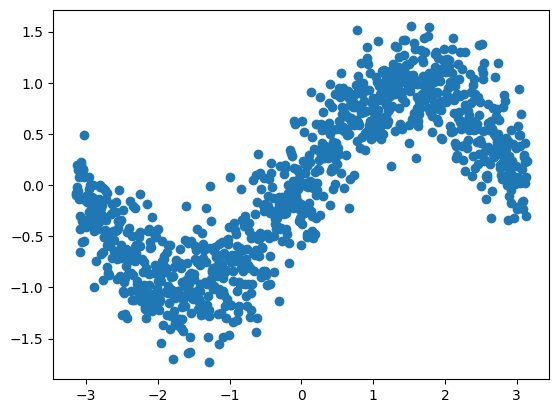

In [21]:
plt.scatter(x, y)

In [22]:
LinearReg = LRTemplate(x.shape, lr=0.01)
print("Initial Weights:\n", LinearReg.params(),"\n", "Cost:", LinearReg.cost(x_train, y_train))

Initial Weights:
 [[1.]
 [1.]] 
 Cost: 2.9468468376744728


Epoch 100 Train_loss: 0.2967 Validation_loss: 0.2724
Epoch 200 Train_loss: 0.2792 Validation_loss: 0.2590
Epoch 300 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 400 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 500 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 600 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 700 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 800 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 900 Train_loss: 0.2789 Validation_loss: 0.2593
Epoch 1000 Train_loss: 0.2789 Validation_loss: 0.2593


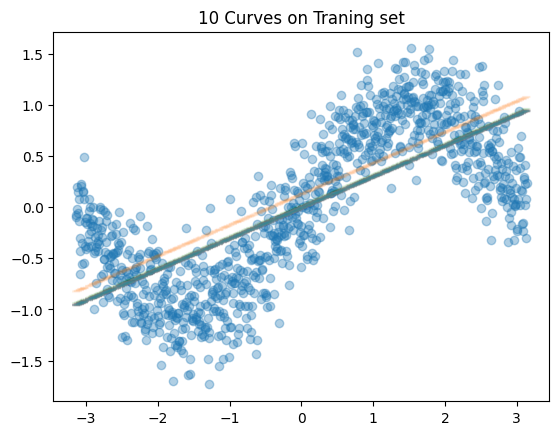

In [23]:
loss_train = []
loss_valid = []

plt.ion()
plt.figure()
plt.scatter(x, y, alpha=0.35)

for i in range(1000):
    loss_train.append(LinearReg.cost(x_train, y_train))
    loss_valid.append(LinearReg.cost(x_valid, y_valid))
    LinearReg.train(x_train, y_train)
    # display(LinearReg.cost(x, y))
    if (i+1) % 100 == 0:
        print(f"Epoch {i+1} Train_loss: {LinearReg.cost(x_train, y_train):.4f} Validation_loss: {LinearReg.cost(x_valid, y_valid):.4f}")
        plt.scatter(x_train, LinearReg.predict(x_train), alpha=0.05, marker='_')
plt.title("10 Curves on Traning set")
plt.show()

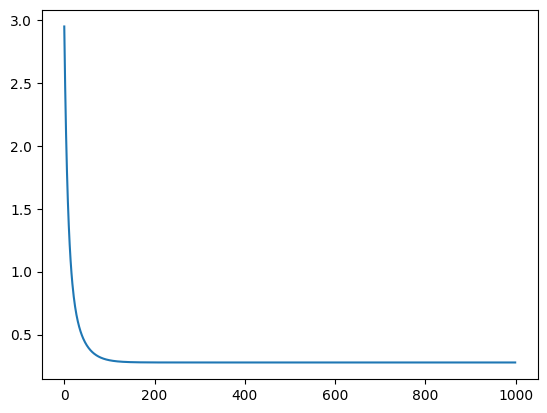

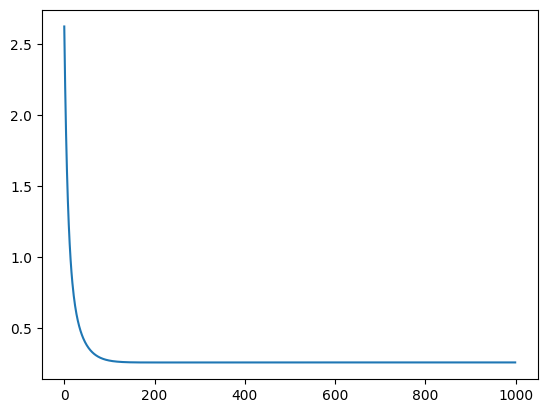

In [24]:
plt.figure()
plt.plot(loss_train)
plt.show()
plt.figure()
plt.plot(loss_valid)
plt.show()

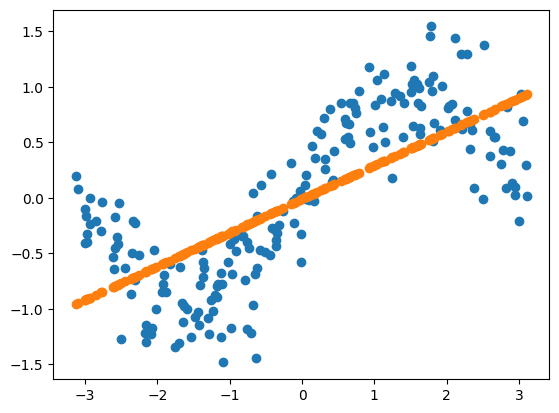

In [26]:
plt.figure()
plt.scatter(x_valid, y_valid)
plt.scatter(x_valid, LinearReg.predict(x_valid))
plt.show()